In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.help import upenn_tagset
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

###### Getting the data  

In [7]:
from sklearn.datasets import fetch_20newsgroups

In [8]:
groups = fetch_20newsgroups()

In [9]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [9]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

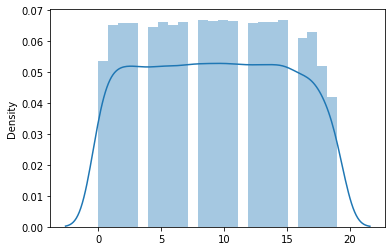

In [11]:
sns.distplot(groups.target)

In [12]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [13]:
groups.target[0]

7

In [14]:
groups.target_names[groups.target[0]]

'rec.autos'

In [10]:
count_vector = CountVectorizer(max_features = 500)

In [11]:
data_count = count_vector.fit_transform(groups.data)

In [26]:
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [27]:
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
print(count_vector.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'ago', 'all', 'already', 'also', 'always', 'am', 'american', 'an', 'and', 'andrew', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'armenian', 'around', 'article', 'as', 'ask', 'at', 'au', 'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but', 'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada', 'cannot', 'car', 'card', 'case', 'cc', 'center', 'change', 'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color', 'com', 'come', 'computer', 'control', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'de',

##### Cleaning it up  abit

###### Preprocessing

In [45]:
def is_letter_only_word(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

cleaned_data = []
for doc in groups.data:
    cleaned_doc = ' '.join(word for word in doc.split()if is_letter_only_word(word))
    cleaned_data.append(cleaned_doc)

In [22]:
from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'eg', 'or', 'last', 'beyond', 'formerly', 'enough', 'ours', 'herein', 'interest', 'while', 'further', 'so', 'nevertheless', 'cant', 'amount', 'nine', 'had', 'bottom', 'thru', 'ten', 'might', 'an', 'under', 'your', 'inc', 'against', 'yourself', 'indeed', 'this', 'once', 'see', 'sixty', 'therein', 'his', 'as', 'take', 'two', 'will', 'own', 'across', 'throughout', 'only', 'during', 'almost', 'onto', 'until', 'put', 'them', 'side', 'bill', 'amongst', 'go', 'those', 'neither', 'to', 'over', 'always', 'beside', 'never', 'in', 'third', 'less', 'someone', 're', 'why', 'should', 'after', 'therefore', 'since', 'could', 'what', 'becomes', 'thereupon', 'anywhere', 'still', 'hereby', 'whither', 'often', 'mostly', 'by', 'she', 'any', 'move', 'and', 'same', 'six', 'part', 'before', 'thus', 'which', 'above', 'sometime', 'three', 'perhaps', 'several', 'somewhere', 'except', 'cry', 'been', 'her', 'moreover', 'down', 'back', 'wherever', 'whereupon', 'we', 'everything', 'who', 'thereafter', 'wh

In [15]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

In [30]:
from nltk.corpus import names
all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
cleaned_data = []
for doc in groups.data:
    doc = doc.lower()
    cleaned_doc = ' '.join(lemmatizer.lemmatize(word)
            for word in doc.split()
            if is_letter_only_word(word) and
            word not in all_names)
cleaned_data.append(cleaned_doc)
cleaned_data_count = count_vector_sw.fit_transform(cleaned_data)


In [31]:
print(count_vector_sw.get_feature_names())

['blue', 'california', 'engine', 'guess', 'help', 'honda', 'institute', 'kg', 'kjg', 'light', 'miss', 'number', 'pasadena', 'plate', 'pm', 'rider', 'serial', 'session', 'signal', 'spring', 'stolen', 'taped', 'track', 'turn', 'usa', 'white', 'willow']


In [24]:
print(cleaned_doc)

stolen california institute of pasadena usa see above stolen from pasadena between and pm on blue and white honda california plate kg serial number engine number no turn signal or light taped over for track rider session at willow spring guess miss help me find my kjg


In [32]:
from sklearn.manifold import TSNE

In [33]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

In [35]:
groups_3.target

array([1, 1, 2, ..., 0, 1, 0], dtype=int64)

In [36]:
np.unique(groups_3.target)

array([0, 1, 2], dtype=int64)

In [37]:
ct_vector = CountVectorizer(max_features = 500)

In [43]:
groups_3_count = ct_vector.fit_transform(groups_3.data)

In [44]:
print(ct_vector.get_feature_names())

['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '30', '3d', '93', '__', '___', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'alaska', 'all', 'also', 'am', 'an', 'analysis', 'and', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'around', 'article', 'as', 'at', 'au', 'available', 'baalke', 'back', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'billion', 'bit', 'book', 'both', 'box', 'brian', 'built', 'but', 'by', 'ca', 'call', 'called', 'can', 'case', 'cc', 'center', 'change', 'children', 'christ', 'christian', 'christians', 'cmu', 'co', 'code', 'color', 'com', 'come', 'commercial', 'comp', 'computer', 'contact', 'cost', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'dc', 'de', 'design', 'development', 'did', 'didn', 'different', 'digex', 'dire

In [47]:
def is_letter_only_word(word):
    for char in word:
        if not char.isalpha():
            return False
    return True
cleaned_data3 = []
for doc in groups_3.data:
    cleaned_doc3 = ' '.join(word for word in doc.split()if is_letter_only_word(word))
    cleaned_data3.append(cleaned_doc3)

    

In [51]:
from nltk.corpus import names
all_names = set(names.words())
cnt_vector_sw = CountVectorizer(stop_words="english", max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
cleaned_data4 = []
for doc in groups.data:
    doc = doc.lower()
    cleaned_doc4 = ' '.join(lemmatizer.lemmatize(word)
            for word in doc.split()
            if is_letter_only_word(word) and
            word not in all_names)
cleaned_data4.append(cleaned_doc4)
cleaned_data4_count = cnt_vector_sw.fit_transform(cleaned_data4)

In [52]:
print(cnt_vector_sw.get_feature_names())

['blue', 'california', 'engine', 'guess', 'help', 'honda', 'institute', 'kg', 'kjg', 'light', 'miss', 'number', 'pasadena', 'plate', 'pm', 'rider', 'serial', 'session', 'signal', 'spring', 'stolen', 'taped', 'track', 'turn', 'usa', 'white', 'willow']


###### Having problems getting the right outputs, review from Stackoverflow !!!!

In [53]:
tsne_model = TSNE(n_components=2, perplexity=40,random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(cleaned_data4_count.toarray())

ValueError: Found array with 1 sample(s) (shape=(1, 27)) while a minimum of 2 is required.

In [54]:
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.show()

NameError: name 'data_tsne' is not defined

In [55]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']

In [56]:
groups_5 = fetch_20newsgroups(categories=categories_5)